## Assignment 1 Group 7

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from collections import Counter
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import(
    word_tokenize,
    wordpunct_tokenize,
    WhitespaceTokenizer,
    RegexpTokenizer,
    sent_tokenize
)

## Load Data

In [2]:
url = "https://storage.googleapis.com/adsp-nlp-open/data/Food_Inspections_20250325.csv"

In [3]:
data = pd.read_csv(url)

In [4]:
data.head(10)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,1068208,CHINA COURT RESTAURANT,CHINA COURT RESTAURANT,2141795.0,Restaurant,Risk 1 (High),1146 N MILWAUKEE AVE,CHICAGO,IL,60642.0,03/14/2012,License Re-Inspection,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.902462,-87.665306,"(41.902462266949634, -87.66530609467256)"
1,1072213,CUDDLE CARE,CUDDLE CARE,1622366.0,Daycare Above and Under 2 Years,Risk 1 (High),4800 S LAKE PARK AVE,CHICAGO,IL,60615.0,10/22/2012,Canvass,Pass,31. CLEAN MULTI-USE UTENSILS AND SINGLE SERVIC...,41.807922,-87.590693,"(41.80792179224785, -87.5906931090992)"
2,1072214,CUDDLE CARE,CUDDLE CARE,1622365.0,Daycare Above and Under 2 Years,Risk 1 (High),4800 S LAKE PARK AVE,CHICAGO,IL,60615.0,10/22/2012,Canvass,Pass,31. CLEAN MULTI-USE UTENSILS AND SINGLE SERVIC...,41.807922,-87.590693,"(41.80792179224785, -87.5906931090992)"
3,1072228,SHARKS FISH & CHICKEN,SHARKS FISH & CHICKEN,2069562.0,Restaurant,Risk 2 (Medium),101 E 51ST ST,CHICAGO,IL,60615.0,10/26/2012,Short Form Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.801892,-87.622566,"(41.80189221533366, -87.62256558837282)"
4,1072252,SALAAM RESTAURANT AND BAKERY,SALAAM RESTAURANT AND BAKERY,2141327.0,Restaurant,Risk 1 (High),700-706 W 79TH ST,CHICAGO,IL,60620.0,01/24/2013,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.750787,-87.641667,"(41.750787498480555, -87.64166664542023)"
5,1072529,GRESHAM ELEMENTARY SCHOOL,GRESHAM ELEMENTARY SCHOOL,23451.0,School,Risk 1 (High),8524 S Green (832W),CHICAGO,IL,60620.0,09/05/2013,Canvass,Fail,12. HAND WASHING FACILITIES: WITH SOAP AND SAN...,41.738913,-87.645062,"(41.73891334027122, -87.6450616939937)"
6,1084236,THE JIBARITO STOP,THE JIBARITO STOP,2156722.0,Mobile Food Dispenser,Risk 3 (Low),2007-2009 S DAMEN AVE,CHICAGO,IL,60608.0,05/25/2012,License,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.854695,-87.675765,"(41.854694701707345, -87.67576513516751)"
7,1084239,MANJARES AL EXPRESS,MANJARES AL EXPRESS,2021538.0,Restaurant,Risk 1 (High),2226-2230 S ASHLAND AVE,CHICAGO,IL,60608.0,05/29/2012,Complaint,Fail,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.851398,-87.666166,"(41.851397799712196, -87.66616621226514)"
8,1084242,CHISCREAM,CHISCREAM,2152278.0,Mobile Food Dispenser,Risk 3 (Low),324 N LEAVITT ST,CHICAGO,IL,60612.0,06/04/2012,License,Fail,"1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS ...",41.887434,-87.681849,"(41.88743405025222, -87.68184949426895)"
9,1084254,DELANO ELEMENTARY,DELANO ELEMENTARY,22911.0,School,Risk 1 (High),3937 W Wilcox St (132S),CHICAGO,IL,60624.0,06/11/2012,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.878772,-87.724649,"(41.87877166307884, -87.72464874852157)"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288942 entries, 0 to 288941
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    288942 non-null  int64  
 1   DBA Name         288942 non-null  object 
 2   AKA Name         286520 non-null  object 
 3   License #        288924 non-null  float64
 4   Facility Type    283741 non-null  object 
 5   Risk             288858 non-null  object 
 6   Address          288942 non-null  object 
 7   City             288777 non-null  object 
 8   State            288884 non-null  object 
 9   Zip              288903 non-null  float64
 10  Inspection Date  288942 non-null  object 
 11  Inspection Type  288941 non-null  object 
 12  Results          288942 non-null  object 
 13  Violations       208777 non-null  object 
 14  Latitude         287957 non-null  float64
 15  Longitude        287957 non-null  float64
 16  Location         287957 non-null  obje

## 1. Select only the records corresponding to failed inspections (see the "results" column).

In [6]:
data = data[data["Results"] == "Fail"]
data.head(10)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,1068208,CHINA COURT RESTAURANT,CHINA COURT RESTAURANT,2141795.0,Restaurant,Risk 1 (High),1146 N MILWAUKEE AVE,CHICAGO,IL,60642.0,03/14/2012,License Re-Inspection,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.902462,-87.665306,"(41.902462266949634, -87.66530609467256)"
5,1072529,GRESHAM ELEMENTARY SCHOOL,GRESHAM ELEMENTARY SCHOOL,23451.0,School,Risk 1 (High),8524 S Green (832W),CHICAGO,IL,60620.0,09/05/2013,Canvass,Fail,12. HAND WASHING FACILITIES: WITH SOAP AND SAN...,41.738913,-87.645062,"(41.73891334027122, -87.6450616939937)"
6,1084236,THE JIBARITO STOP,THE JIBARITO STOP,2156722.0,Mobile Food Dispenser,Risk 3 (Low),2007-2009 S DAMEN AVE,CHICAGO,IL,60608.0,05/25/2012,License,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.854695,-87.675765,"(41.854694701707345, -87.67576513516751)"
7,1084239,MANJARES AL EXPRESS,MANJARES AL EXPRESS,2021538.0,Restaurant,Risk 1 (High),2226-2230 S ASHLAND AVE,CHICAGO,IL,60608.0,05/29/2012,Complaint,Fail,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.851398,-87.666166,"(41.851397799712196, -87.66616621226514)"
8,1084242,CHISCREAM,CHISCREAM,2152278.0,Mobile Food Dispenser,Risk 3 (Low),324 N LEAVITT ST,CHICAGO,IL,60612.0,06/04/2012,License,Fail,"1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS ...",41.887434,-87.681849,"(41.88743405025222, -87.68184949426895)"
10,1084269,TORTERIA LAS FUTBOLERAS,TORTERIA LAS FUTBOLERAS,1578487.0,Restaurant,Risk 1 (High),2152 W CERMAK RD,CHICAGO,IL,60608.0,06/25/2012,Complaint,Fail,"6. HANDS WASHED AND CLEANED, GOOD HYGIENIC PRA...",41.852213,-87.680395,"(41.85221316094893, -87.68039534069054)"
11,1084275,THE JAM HOUSE,NaN,2162186.0,Restaurant,Risk 2 (Medium),1854 W 18TH ST,CHICAGO,IL,60608.0,06/28/2012,License,Fail,"10. SEWAGE AND WASTE WATER DISPOSAL, NO BACK S...",41.857806,-87.673279,"(41.85780570258303, -87.67327895610481)"
12,1084320,"PEAPOD, LLC.",PEAPOD,2177217.0,Wholesale,Risk 3 (Low),2300 S THROOP ST,CHICAGO,IL,60608.0,07/25/2012,License,Fail,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.850451,-87.658798,"(41.85045102427, -87.65879785567869)"
13,1084358,SUCCEZZ,NaN,2098980.0,Liquor,Risk 3 (Low),2201 W WALNUT ST,CHICAGO,IL,60612.0,09/04/2012,License,Fail,8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS...,41.885672,-87.681772,"(41.88567164152838, -87.68177223280703)"
14,1084366,BIRRIERIA Y TAQUERIA EL CHIVO FELIZ INC.,BIRRIERIA Y TAQUERIA EL CHIVO FELIZ INC.,1942781.0,Restaurant,Risk 1 (High),2023 S WESTERN AVE,CHICAGO,IL,60608.0,09/10/2012,Complaint,Fail,"16. FOOD PROTECTED DURING STORAGE, PREPARATION...",41.853993,-87.685543,"(41.85399278549998, -87.68554267529505)"


In [7]:
data.isnull().sum()

Inspection ID         0
DBA Name              0
AKA Name            643
License #             4
Facility Type       394
Risk                 21
Address               0
City                 38
State                12
Zip                   5
Inspection Date       0
Inspection Type       0
Results               0
Violations         3528
Latitude            193
Longitude           193
Location            193
dtype: int64

In [8]:
data.dropna(subset=["Violations"], inplace=True)
data.isnull().sum()

Inspection ID        0
DBA Name             0
AKA Name           457
License #            3
Facility Type       46
Risk                 1
Address              0
City                29
State               12
Zip                  4
Inspection Date      0
Inspection Type      0
Results              0
Violations           0
Latitude           179
Longitude          179
Location           179
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52562 entries, 0 to 288941
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Inspection ID    52562 non-null  int64  
 1   DBA Name         52562 non-null  object 
 2   AKA Name         52105 non-null  object 
 3   License #        52559 non-null  float64
 4   Facility Type    52516 non-null  object 
 5   Risk             52561 non-null  object 
 6   Address          52562 non-null  object 
 7   City             52533 non-null  object 
 8   State            52550 non-null  object 
 9   Zip              52558 non-null  float64
 10  Inspection Date  52562 non-null  object 
 11  Inspection Type  52562 non-null  object 
 12  Results          52562 non-null  object 
 13  Violations       52562 non-null  object 
 14  Latitude         52383 non-null  float64
 15  Longitude        52383 non-null  float64
 16  Location         52383 non-null  object 
dtypes: float64(4), i

## 2. Use regular expressions to extract the regulation description and inspector comments from the "violations" columns.

Every record representations a restaurant inspection. The "violations" column contains "|"-separated violations encountered during inspection (there can be more than one violation during a given inspection). 

Each violation generally consists of: 

regulation code + regulation description + comments describing how the regulation was violated.

In [10]:
data["Violations"].iloc[0]

'18. NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS PROTECTED/RODENT PROOFED, A WRITTEN LOG SHALL BE MAINTAINED AVAILABLE TO THE INSPECTORS - Comments: FOUND NO PEST CONTROL LOG BOOK ON PREMISES,FRONT/REAR DOORS TO PREMISES WITH 1/4" MODE OF ENTRY.MUST PROVIDE PEST CONTROL LOG BOOK,RODENT PROOF SAID DOORS ALL ACROSS THE BOTTOMS. | 32. FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DESIGNED, CONSTRUCTED AND MAINTAINED - Comments: SPLASHGUARD AT FRONT EXPOSED HANDSINK IS MISSING MUST PROVIDE,SINK STOPPERS ARE NEEDED FOR THE 3 COMPARTMENT SINK.   | 41. PREMISES MAINTAINED FREE OF LITTER, UNNECESSARY ARTICLES, CLEANING  EQUIPMENT PROPERLY STORED - Comments: DETAIL CLEAN,ORGANIZE REAR STORAGE AREAS AND REMOVE ALL CLUTTER/UNUSED KITCHEN EQUIPMENTS DUE TO POTENTIAL PEST HARBORAGE.'

In [11]:
pattern = r"(?:^|\|)\s*(\d{1,2})\.\s(.*?)\s*-\s*Comments:\s*(.*?)(?=\s*(?:\|\s*\d{1,2}\.|$))"
violations_extracted = []

# Loop through the full DataFrame
for idx, row in data.iterrows():
    text = row['Violations']
    if pd.isna(text):
        continue  
    matches = re.findall(pattern, text)
    for code, desc, comment in matches:
        violations_extracted.append({
            "Inspection ID": row["Inspection ID"],
            "Code": code.strip(),
            "Description": desc.strip(),
            "Comment": comment.strip()
        })

Split = pd.DataFrame(violations_extracted)

In [12]:
Split = pd.DataFrame(Split)
Split.head(10)

,Inspection ID,Code,Description,Comment
0,1068208,18,NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS...,"FOUND NO PEST CONTROL LOG BOOK ON PREMISES,FRO..."
1,1068208,32,FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DE...,SPLASHGUARD AT FRONT EXPOSED HANDSINK IS MISSI...
2,1068208,41,"PREMISES MAINTAINED FREE OF LITTER, UNNECESSAR...","DETAIL CLEAN,ORGANIZE REAR STORAGE AREAS AND R..."
3,1072529,12,HAND WASHING FACILITIES: WITH SOAP AND SANITAR...,NO SOAP FOR HAND WASHING IN STAFF RESTROOM. IN...
4,1072529,18,NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS...,"OBSERVED 30 MICE DROPPINGS UNDER RACKS, ON TOP..."
5,1072529,34,"FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD RE...","CLEAN/SANITIZE FLOORS IN KITCHEN, LUNCHROOM AN..."
6,1084236,18,NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS...,THE REAR PASSENGER SIDE OF THE TRUCK HAS AN OP...
7,1084236,32,FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DE...,THE SERVING COUNTERS ARE BLACK METAL COVERED W...
8,1084236,34,"FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD RE...","THE FLOORS ARE ROUGH IN SPOTS AND DIRTY, REMOV..."
9,1084239,2,FACILITIES TO MAINTAIN PROPER TEMPERATURE,THE SOUTH FRONT KITCHEN PREP COOLER HAS AN AMB...


In [13]:
Split.describe()

,Inspection ID
count,3.485970e+05
mean,1.867104e+06
std,7.319853e+05
min,4.425500e+04
25%,1.386010e+06
50%,2.145696e+06
75%,2.524012e+06
max,2.614305e+06


In [14]:
Split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348597 entries, 0 to 348596
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Inspection ID  348597 non-null  int64 
 1   Code           348597 non-null  object
 2   Description    348597 non-null  object
 3   Comment        348597 non-null  object
dtypes: int64(1), object(3)
memory usage: 10.6+ MB


## 3. Count how many times each regulation description occurred in the table and visualize the top 10 most frequent regulation descriptions.

<Axes: title={'center': 'Top 10 Most Frequent Regulation Descriptions'}, ylabel='Description'>

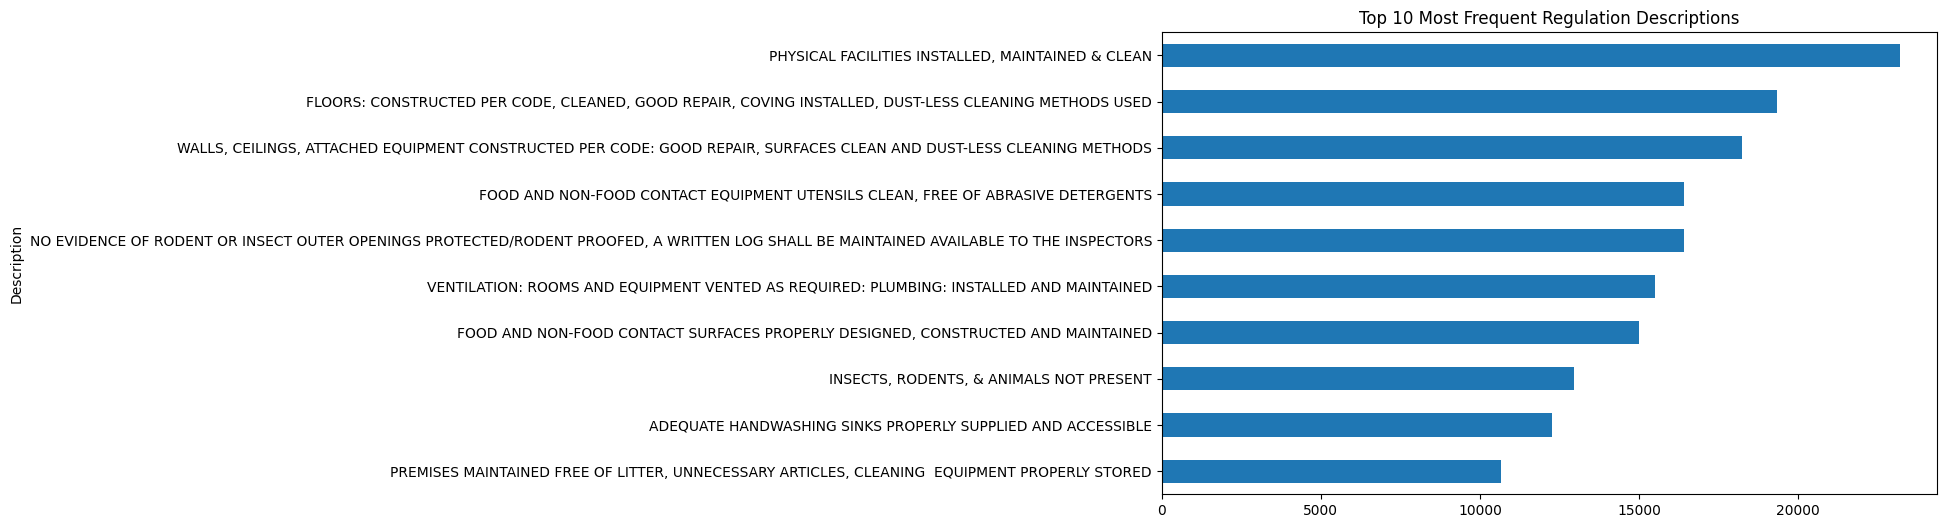

In [15]:
# Count occurrences of each regulation description
description_counts = Split["Description"].value_counts()

# Get the top 10 most frequent descriptions
top_10_descriptions = description_counts.head(10)

# Visualize the top 10 descriptions
top_10_descriptions.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6), title="Top 10 Most Frequent Regulation Descriptions")

## 4. Tokenize the comments and provide a count of the top 10:

#### 1.Raw tokens

In [16]:
Split['Tokens_comment'] = Split['Comment'].apply(lambda x: word_tokenize(x))

In [17]:
Split.head(10)

,Inspection ID,Code,Description,Comment,Tokens_comment
0,1068208,18,NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS...,"FOUND NO PEST CONTROL LOG BOOK ON PREMISES,FRO...","[FOUND, NO, PEST, CONTROL, LOG, BOOK, ON, PREM..."
1,1068208,32,FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DE...,SPLASHGUARD AT FRONT EXPOSED HANDSINK IS MISSI...,"[SPLASHGUARD, AT, FRONT, EXPOSED, HANDSINK, IS..."
2,1068208,41,"PREMISES MAINTAINED FREE OF LITTER, UNNECESSAR...","DETAIL CLEAN,ORGANIZE REAR STORAGE AREAS AND R...","[DETAIL, CLEAN, ,, ORGANIZE, REAR, STORAGE, AR..."
3,1072529,12,HAND WASHING FACILITIES: WITH SOAP AND SANITAR...,NO SOAP FOR HAND WASHING IN STAFF RESTROOM. IN...,"[NO, SOAP, FOR, HAND, WASHING, IN, STAFF, REST..."
4,1072529,18,NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS...,"OBSERVED 30 MICE DROPPINGS UNDER RACKS, ON TOP...","[OBSERVED, 30, MICE, DROPPINGS, UNDER, RACKS, ..."
5,1072529,34,"FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD RE...","CLEAN/SANITIZE FLOORS IN KITCHEN, LUNCHROOM AN...","[CLEAN/SANITIZE, FLOORS, IN, KITCHEN, ,, LUNCH..."
6,1084236,18,NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS...,THE REAR PASSENGER SIDE OF THE TRUCK HAS AN OP...,"[THE, REAR, PASSENGER, SIDE, OF, THE, TRUCK, H..."
7,1084236,32,FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DE...,THE SERVING COUNTERS ARE BLACK METAL COVERED W...,"[THE, SERVING, COUNTERS, ARE, BLACK, METAL, CO..."
8,1084236,34,"FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD RE...","THE FLOORS ARE ROUGH IN SPOTS AND DIRTY, REMOV...","[THE, FLOORS, ARE, ROUGH, IN, SPOTS, AND, DIRT..."
9,1084239,2,FACILITIES TO MAINTAIN PROPER TEMPERATURE,THE SOUTH FRONT KITCHEN PREP COOLER HAS AN AMB...,"[THE, SOUTH, FRONT, KITCHEN, PREP, COOLER, HAS..."


In [18]:
# Flatten the Cleaned_Tokens column and count occurrences
top_rawed_tokens = Split['Tokens_comment'].explode().value_counts().head(10)

# Display the top ten cleaned tokens
print(top_rawed_tokens)

Tokens_comment
.             809837
AND           413358
,             377495
THE           310109
IN            275828
TO            268773
OF            181244
MUST          163073
ON            160002
INSTRUCTED    150338
Name: count, dtype: int64


#### 2.Preprocessed tokens

In [19]:
# Define a function to clean tokens remove stop words and non-alphabetic characters lowercase them
def clean_tokens(tokens_series):
    stop_words = set(stopwords.words('english'))
    cleaned_tokens = tokens_series.apply(
        lambda tokens: [
            token.lower() for token in tokens
            if token.isalpha() and token.lower() not in stop_words
        ]
    )
    return cleaned_tokens

In [20]:
Split['Cleaned_Tokens'] = clean_tokens(Split['Tokens_comment'])

In [21]:
Split.head(10)

,Inspection ID,Code,Description,Comment,Tokens_comment,Cleaned_Tokens
0,1068208,18,NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS...,"FOUND NO PEST CONTROL LOG BOOK ON PREMISES,FRO...","[FOUND, NO, PEST, CONTROL, LOG, BOOK, ON, PREM...","[found, pest, control, log, book, premises, do..."
1,1068208,32,FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DE...,SPLASHGUARD AT FRONT EXPOSED HANDSINK IS MISSI...,"[SPLASHGUARD, AT, FRONT, EXPOSED, HANDSINK, IS...","[splashguard, front, exposed, handsink, missin..."
2,1068208,41,"PREMISES MAINTAINED FREE OF LITTER, UNNECESSAR...","DETAIL CLEAN,ORGANIZE REAR STORAGE AREAS AND R...","[DETAIL, CLEAN, ,, ORGANIZE, REAR, STORAGE, AR...","[detail, clean, organize, rear, storage, areas..."
3,1072529,12,HAND WASHING FACILITIES: WITH SOAP AND SANITAR...,NO SOAP FOR HAND WASHING IN STAFF RESTROOM. IN...,"[NO, SOAP, FOR, HAND, WASHING, IN, STAFF, REST...","[soap, hand, washing, staff, restroom, instruc..."
4,1072529,18,NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS...,"OBSERVED 30 MICE DROPPINGS UNDER RACKS, ON TOP...","[OBSERVED, 30, MICE, DROPPINGS, UNDER, RACKS, ...","[observed, mice, droppings, racks, top, bulk, ..."
5,1072529,34,"FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD RE...","CLEAN/SANITIZE FLOORS IN KITCHEN, LUNCHROOM AN...","[CLEAN/SANITIZE, FLOORS, IN, KITCHEN, ,, LUNCH...","[floors, kitchen, lunchroom, pantry, maintain,..."
6,1084236,18,NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS...,THE REAR PASSENGER SIDE OF THE TRUCK HAS AN OP...,"[THE, REAR, PASSENGER, SIDE, OF, THE, TRUCK, H...","[rear, passenger, side, truck, open, louver, v..."
7,1084236,32,FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DE...,THE SERVING COUNTERS ARE BLACK METAL COVERED W...,"[THE, SERVING, COUNTERS, ARE, BLACK, METAL, CO...","[serving, counters, black, metal, covered, con..."
8,1084236,34,"FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD RE...","THE FLOORS ARE ROUGH IN SPOTS AND DIRTY, REMOV...","[THE, FLOORS, ARE, ROUGH, IN, SPOTS, AND, DIRT...","[floors, rough, spots, dirty, remove, corrosio..."
9,1084239,2,FACILITIES TO MAINTAIN PROPER TEMPERATURE,THE SOUTH FRONT KITCHEN PREP COOLER HAS AN AMB...,"[THE, SOUTH, FRONT, KITCHEN, PREP, COOLER, HAS...","[south, front, kitchen, prep, cooler, ambient,..."


In [22]:
# Flatten the Cleaned_Tokens column and count occurrences
top_cleaned_tokens = Split['Cleaned_Tokens'].explode().value_counts().head(10)

# Display the top ten cleaned tokens
print(top_cleaned_tokens)

Cleaned_Tokens
must          172632
instructed    157383
food          149896
observed      148452
clean         122287
area          115504
maintain      101506
prep           93209
sink           92415
provide        83697
Name: count, dtype: int64


#### 3. Preprocessed tokens + Porter stemmer

In [23]:
Split['Porter'] = Split['Cleaned_Tokens'].apply(lambda x: [nltk.PorterStemmer().stem(token) for token in x])

In [24]:
# Flatten the Cleaned_Tokens column and count occurrences
top_porter_tokens = Split['Porter'].explode().value_counts().head(10)

# Display the top ten cleaned tokens
print(top_porter_tokens)

Porter
food        178411
must        172637
area        157654
instruct    157628
clean       150467
observ      148990
maintain    113115
sink        111191
floor       102014
provid       97075
Name: count, dtype: int64


### 4. Preprocessed tokens + Lancaster stemmer

In [25]:
Split['Lancaster'] = Split['Cleaned_Tokens'].apply(lambda x: [nltk.LancasterStemmer().stem(token) for token in x])

In [26]:
# Flatten the Cleaned_Tokens column and count occurrences
top_lancaster_tokens = Split['Lancaster'].explode().value_counts().head(10)

# Display the top ten cleaned tokens
print(top_lancaster_tokens)

Lancaster
food        178412
must        172639
cle         164164
instruct    157662
observ      148989
are         115504
maintain    113129
prep        113020
sink        111193
stor        108281
Name: count, dtype: int64


### 5. Preprocessed tokens + lemmatization

In [27]:
Split['Lemmatized'] = Split['Cleaned_Tokens'].apply(lambda x: [nltk.WordNetLemmatizer().lemmatize(token) for token in x])

In [28]:
# Flatten the Cleaned_Tokens column and count occurrences
top_lemmatized_tokens = Split['Lemmatized'].explode().value_counts().head(10)

# Display the top ten cleaned tokens
print(top_lemmatized_tokens)

Lemmatized
food          178410
must          172636
area          157653
instructed    157383
observed      148452
clean         122294
sink          111189
floor         101593
maintain      101506
prep           93223
Name: count, dtype: int64


## 5. Briefly describe the differences in various tokens from (4).

In [29]:
# Combine all top tokens into a single DataFrame
top_rawed_tokens_df = top_rawed_tokens.reset_index()
top_rawed_tokens_df.columns = ['Rawed Tokens', 'Count']

top_cleaned_tokens_df = top_cleaned_tokens.reset_index()
top_cleaned_tokens_df.columns = ['Cleaned Tokens', 'Count']

top_porter_tokens_df = top_porter_tokens.reset_index()
top_porter_tokens_df.columns = ['Porter Tokens', 'Count']

top_lancaster_tokens_df = top_lancaster_tokens.reset_index()
top_lancaster_tokens_df.columns = ['Lancaster Tokens', 'Count']

top_lemmatized_tokens_df = top_lemmatized_tokens.reset_index()
top_lemmatized_tokens_df.columns = ['Lemmatized Tokens', 'Count']


In [30]:
# Concatenate all top token DataFrames along axis=1
all_top_tokens = pd.concat(
    [top_rawed_tokens_df, top_cleaned_tokens_df, top_porter_tokens_df, top_lancaster_tokens_df, top_lemmatized_tokens_df],
    axis=1
)
# Display the concatenated DataFrame
all_top_tokens

,Rawed Tokens,Count,Cleaned Tokens,Count,Porter Tokens,Count,Lancaster Tokens,Count,Lemmatized Tokens,Count
0,.,809837,must,172632,food,178411,food,178412,food,178410
1,AND,413358,instructed,157383,must,172637,must,172639,must,172636
2,",",377495,food,149896,area,157654,cle,164164,area,157653
3,THE,310109,observed,148452,instruct,157628,instruct,157662,instructed,157383
4,IN,275828,clean,122287,clean,150467,observ,148989,observed,148452
5,TO,268773,area,115504,observ,148990,are,115504,clean,122294
6,OF,181244,maintain,101506,maintain,113115,maintain,113129,sink,111189
7,MUST,163073,prep,93209,sink,111191,prep,113020,floor,101593
8,ON,160002,sink,92415,floor,102014,sink,111193,maintain,101506
9,INSTRUCTED,150338,provide,83697,provid,97075,stor,108281,prep,93223



**Raw Tokens**
Direct output from word_tokenize(). Includes punctuation, stopwords (e.g., "the", "at", "on"), and mixed case

**Processed Tokens**
Lowercased, punctuation removed, and stopwords filtered. Focuses on meaningful content words only

**Porter Stemmed**
Uses Porter stemming algorithm. Trims suffixes with a rule-based approach. Produces readable but sometimes unnatural roots

**Lancaster Stemmed**
A more aggressive stemmer. Often produces very short stems. May lose interpretability but works well for compact feature sets

**Lemmatized**
Uses WordNet lemmatizer, which is dictionary-based. Converts words to their base form (lemma) while keeping them readable

In [31]:
Split.head(10)

,Inspection ID,Code,Description,Comment,Tokens_comment,Cleaned_Tokens,Porter,Lancaster,Lemmatized
0,1068208,18,NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS...,"FOUND NO PEST CONTROL LOG BOOK ON PREMISES,FRO...","[FOUND, NO, PEST, CONTROL, LOG, BOOK, ON, PREM...","[found, pest, control, log, book, premises, do...","[found, pest, control, log, book, premis, door...","[found, pest, control, log, book, prem, door, ...","[found, pest, control, log, book, premise, doo..."
1,1068208,32,FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DE...,SPLASHGUARD AT FRONT EXPOSED HANDSINK IS MISSI...,"[SPLASHGUARD, AT, FRONT, EXPOSED, HANDSINK, IS...","[splashguard, front, exposed, handsink, missin...","[splashguard, front, expos, handsink, miss, mu...","[splashguard, front, expos, handsink, miss, mu...","[splashguard, front, exposed, handsink, missin..."
2,1068208,41,"PREMISES MAINTAINED FREE OF LITTER, UNNECESSAR...","DETAIL CLEAN,ORGANIZE REAR STORAGE AREAS AND R...","[DETAIL, CLEAN, ,, ORGANIZE, REAR, STORAGE, AR...","[detail, clean, organize, rear, storage, areas...","[detail, clean, organ, rear, storag, area, rem...","[detail, cle, org, rear, stor, area, remov, ki...","[detail, clean, organize, rear, storage, area,..."
3,1072529,12,HAND WASHING FACILITIES: WITH SOAP AND SANITAR...,NO SOAP FOR HAND WASHING IN STAFF RESTROOM. IN...,"[NO, SOAP, FOR, HAND, WASHING, IN, STAFF, REST...","[soap, hand, washing, staff, restroom, instruc...","[soap, hand, wash, staff, restroom, instruct, ...","[soap, hand, wash, staff, restroom, instruct, ...","[soap, hand, washing, staff, restroom, instruc..."
4,1072529,18,NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS...,"OBSERVED 30 MICE DROPPINGS UNDER RACKS, ON TOP...","[OBSERVED, 30, MICE, DROPPINGS, UNDER, RACKS, ...","[observed, mice, droppings, racks, top, bulk, ...","[observ, mice, drop, rack, top, bulk, contain,...","[observ, mic, drop, rack, top, bulk, contain, ...","[observed, mouse, droppings, rack, top, bulk, ..."
5,1072529,34,"FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD RE...","CLEAN/SANITIZE FLOORS IN KITCHEN, LUNCHROOM AN...","[CLEAN/SANITIZE, FLOORS, IN, KITCHEN, ,, LUNCH...","[floors, kitchen, lunchroom, pantry, maintain,...","[floor, kitchen, lunchroom, pantri, maintain, ...","[flo, kitch, lunchroom, pantry, maintain, tim]","[floor, kitchen, lunchroom, pantry, maintain, ..."
6,1084236,18,NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS...,THE REAR PASSENGER SIDE OF THE TRUCK HAS AN OP...,"[THE, REAR, PASSENGER, SIDE, OF, THE, TRUCK, H...","[rear, passenger, side, truck, open, louver, v...","[rear, passeng, side, truck, open, louver, ven...","[rear, passeng, sid, truck, op, louv, vent, op...","[rear, passenger, side, truck, open, louver, v..."
7,1084236,32,FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DE...,THE SERVING COUNTERS ARE BLACK METAL COVERED W...,"[THE, SERVING, COUNTERS, ARE, BLACK, METAL, CO...","[serving, counters, black, metal, covered, con...","[serv, counter, black, metal, cover, contact, ...","[serv, count, black, met, cov, contact, pap, c...","[serving, counter, black, metal, covered, cont..."
8,1084236,34,"FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD RE...","THE FLOORS ARE ROUGH IN SPOTS AND DIRTY, REMOV...","[THE, FLOORS, ARE, ROUGH, IN, SPOTS, AND, DIRT...","[floors, rough, spots, dirty, remove, corrosio...","[floor, rough, spot, dirti, remov, corros, cle...","[flo, rough, spot, dirty, remov, corrod, cle, ...","[floor, rough, spot, dirty, remove, corrosion,..."
9,1084239,2,FACILITIES TO MAINTAIN PROPER TEMPERATURE,THE SOUTH FRONT KITCHEN PREP COOLER HAS AN AMB...,"[THE, SOUTH, FRONT, KITCHEN, PREP, COOLER, HAS...","[south, front, kitchen, prep, cooler, ambient,...","[south, front, kitchen, prep, cooler, ambient,...","[sou, front, kitch, prep, cool, amby, air, tem...","[south, front, kitchen, prep, cooler, ambient,..."


In [32]:
# Extract the first row of Split
example_row = Split.iloc[0]

# Align all token lists by replacing missing words with NaN
aligned_tokens = pd.DataFrame({
    "Tokens_comment": pd.Series(example_row["Tokens_comment"]),
    "Cleaned_Tokens": pd.Series(example_row["Cleaned_Tokens"]),
    "Porter": pd.Series(example_row["Porter"]),
    "Lancaster": pd.Series(example_row["Lancaster"]),
    "Lemmatized": pd.Series(example_row["Lemmatized"])
})


In [33]:
aligned_tokens

,Tokens_comment,Cleaned_Tokens,Porter,Lancaster,Lemmatized
0,FOUND,found,found,found,found
1,NO,pest,pest,pest,pest
2,PEST,control,control,control,control
3,CONTROL,log,log,log,log
4,LOG,book,book,book,book
5,BOOK,premises,premis,prem,premise
6,ON,doors,door,door,door
7,PREMISES,premises,premis,prem,premise
8,",",mode,mode,mod,mode
9,FRONT/REAR,provide,provid,provid,provide


We took the first row as an example, from the table we can see that:

Raw tokens include punctuation and uppercase words.

Cleaned tokens have been normalized (e.g., lowercase).

Porter stemmer is a less aggressive way of reducing words to their roots.

Lancaster stemmer is a more aggressive reduction, take a long time to run and the result is hard to interpret.

Lemmatized tokens provide the base form, keeping the meaning intact according to standard language rules.

For example:

"BOOK" → cleaned, Porter, Lancaster, and Lemmatized forms remain the same as "book".

"PREMISES" → cleaned version is "premises", Porter stems it to "premis", Lancaster reduces it to "prem", while lemmatization gives the base form "premise".

Overall, Lemmatization better inpretation wise and does the job here quickly too.